# Content and Objectives

- Show effect and validity of Wiener-Khinchin
- Method: Several windowed signals are being generated and their FFT is being determined

# Import

In [2]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import shutil

# showing figures inline
%matplotlib inline

In [3]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True if shutil.which('latex') else False)

matplotlib.rc('figure', figsize=(18, 10) )

# Parameters

In [4]:
# set time resp. pulse interval and related parameters
t_min = -0.0
t_max = 50.0
t_s = 0.1                                 # sample time

t = np.arange(t_min, t_max+t_s, t_s)

# frequency of sine
f0=1 

# frequency regime (mind properties of FFT)
f=np.arange( -1/(2*t_s), 1/(2*t_s)+1/(t_max-t_min), 1/(t_max-t_min))

# Signals and their spectra

In [5]:
# original signal    
x = np.sin( 2*np.pi * f0 * t )

# windowed versions and fft thereoff
T1 = 2
x_T1 = x * [ (tau < T1) for tau in t]
X_T1 = abs( np.fft.fftshift(np.fft.fft( x_T1 )))**2 / (2*T1)

T2 = 10
x_T2 = x * [ (tau < T2) for tau in t]
X_T2 = abs( np.fft.fftshift(np.fft.fft( x_T2 )))**2 / (2*T2)    

T3 = 50
x_T3 = x * [ (tau < T3) for tau in t]
X_T3 = abs( np.fft.fftshift(np.fft.fft( x_T3 )))**2 / (2*T3)

# Plotting

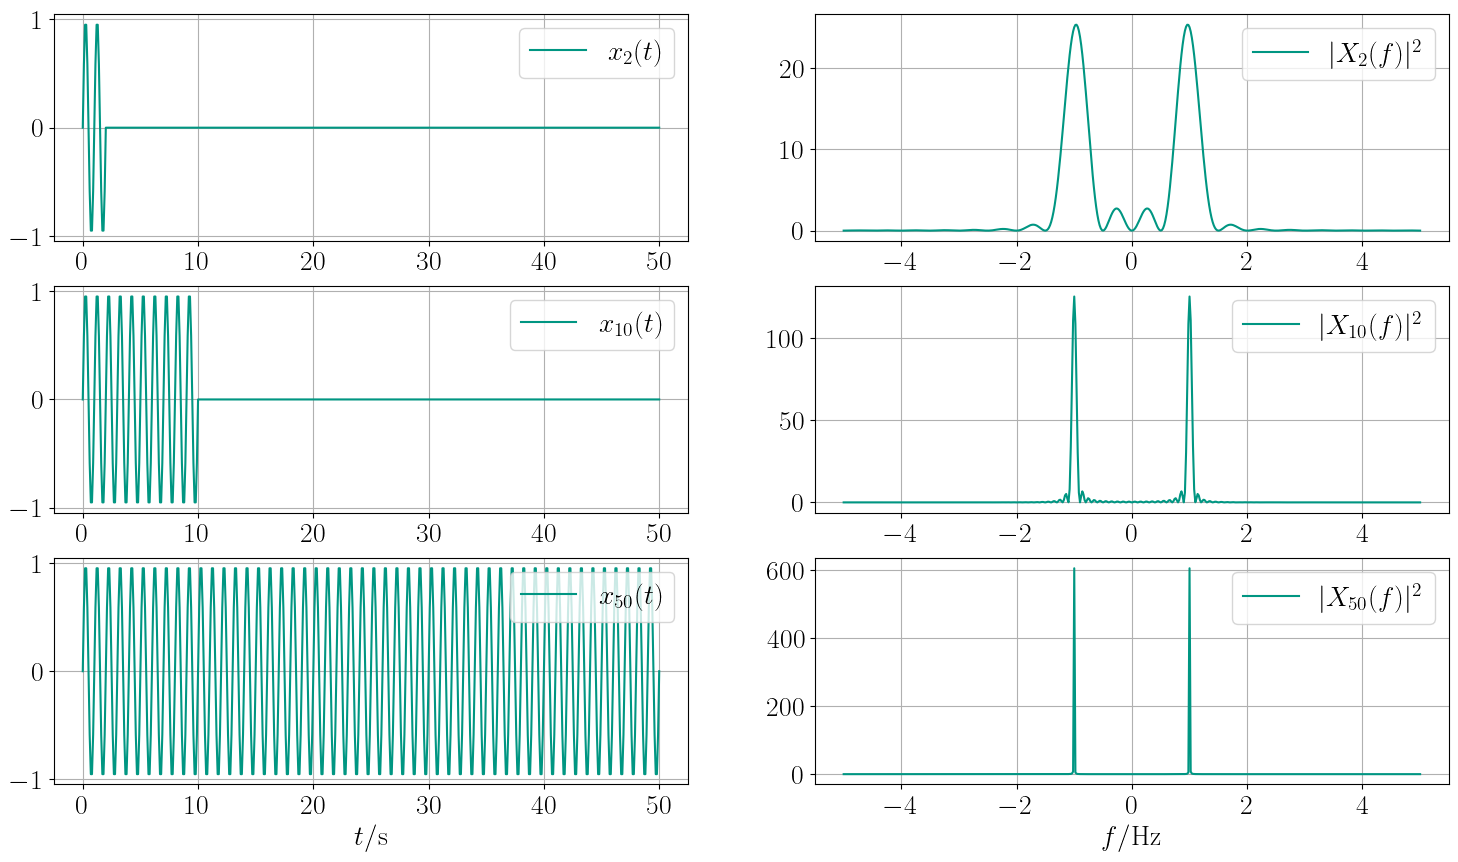

In [10]:
# plotting
plt.figure(1)

plt.subplot(321)
plt.plot(t, x_T1, c=(0,0.59,0.51), label=r'$x_{2}(t)$')
plt.grid(True); #plt.xlabel('$t$');  
#plt.ylabel('$x_{2}(t)$')
plt.legend( loc='upper right')
#plt.annotate('$T=2.0$', xy=(1.0,0.0), xytext=(10,0.5), )

plt.subplot(323)
plt.plot(t, x_T2, c=(0,0.59,0.51), label=r'$x_{10}(t)$')
plt.grid(True); #plt.xlabel('$t$');  
#plt.ylabel('$x_{10}(t)$')
plt.legend( loc='upper right')
#plt.annotate('$T=10.0$', xy=(1.0,0.0), xytext=(15,0.5), )

plt.subplot(325)
plt.plot(t, x_T3, c=(0,0.59,0.51), label=r'$x_{50}(t)$')
plt.grid(True); plt.xlabel(r'$t/\mathrm{s}$');  
#plt.ylabel('$x_{50}(t)$')
plt.legend( loc='upper right')


plt.subplot(322)
plt.plot(f, X_T1, c=(0,0.59,0.51), label=r'$|X_{2}(f)|^2$')
plt.grid(True); #plt.xlabel('$f$');  
plt.legend( loc='upper right')
#plt.ylabel('$|X_{2}(f)|^2/4$')

plt.subplot(324)
plt.plot(f, X_T2, c=(0,0.59,0.51), label=r'$|X_{10}(f)|^2$')
plt.grid(True); #plt.xlabel('$f$');  
#plt.ylabel('$|X_{10}(f)|^2/20$')
plt.legend( loc='upper right')

plt.subplot(326)
plt.plot(f, X_T3, c=(0,0.59,0.51), label=r'$|X_{50}(f)|^2$')
plt.grid(True); plt.xlabel(r'$f/\mathrm{Hz}$');  
#plt.ylabel('$|X_{50}(f)|^2/100$')
plt.legend( loc='upper right')

plt.savefig('wiener_khinchin.pdf',bbox_inches='tight')